# Seaborn: clustermap

In [ ]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

: 

## Basics - Toy Example

In [2]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

In [3]:
toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


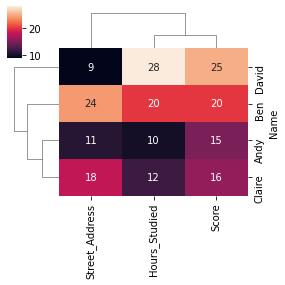

In [4]:
sns.clustermap(toy_data, figsize=(4, 4), annot=True);

## Basics - Penguins Dataset

#### Load the data

In [5]:
penguins = sns.load_dataset('penguins').dropna()

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [7]:
penguins.shape

(333, 7)

#### Build clustermap

In [8]:
numerical_cols = penguins.columns[2:6]

numerical_cols

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

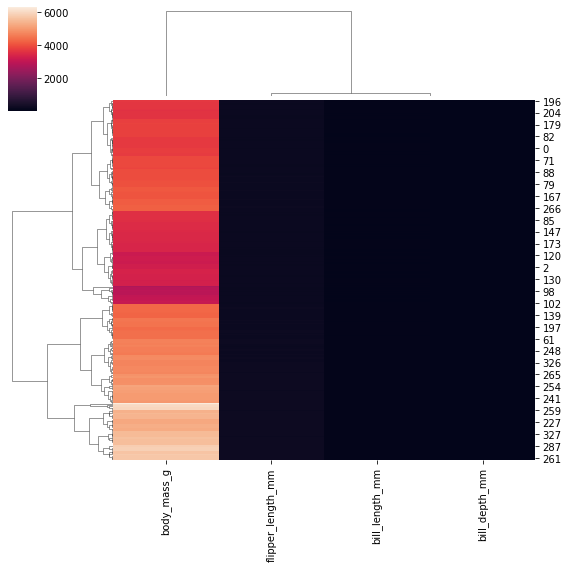

In [15]:
sns.clustermap(penguins[numerical_cols],figsize=(8, 8));

#### `standard_scale`

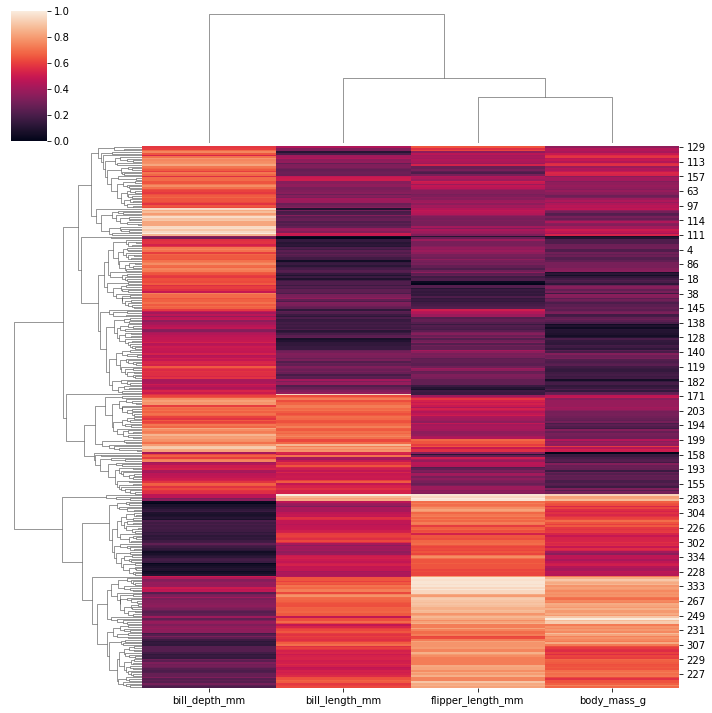

In [17]:
sns.clustermap(penguins[numerical_cols], standard_scale=1);
# standard_scale=1 scales the data to have to 0 to 1 range

## Linkage and Metric

#### `method` = Linkage

Check out the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) to learn more about available linkage options.

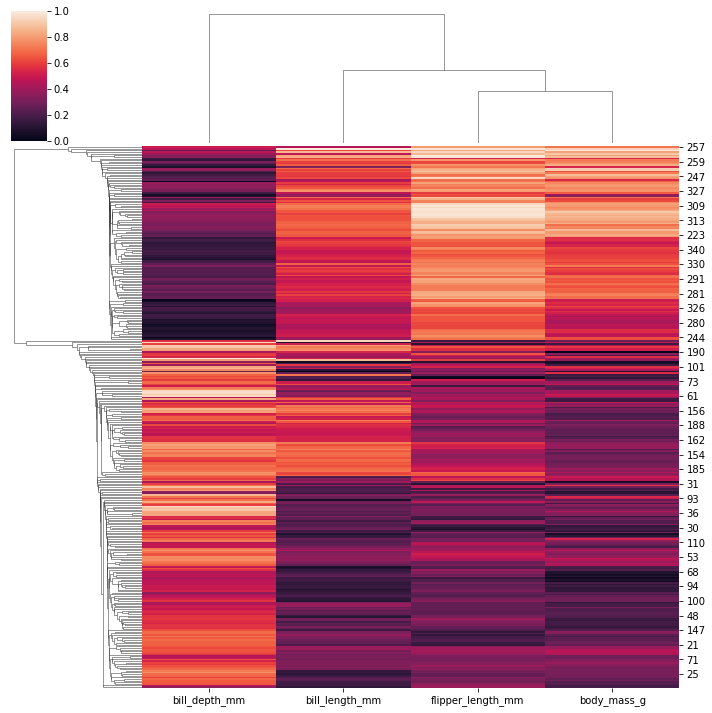

In [18]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, method='single');

#### `metric`

See `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) to learn about other available metrics.

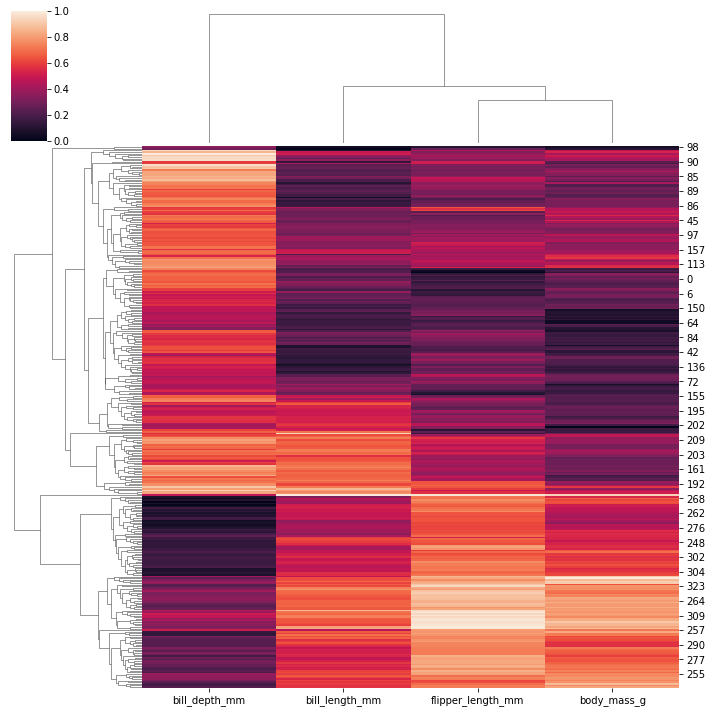

In [19]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, metric='cityblock');

## Additional Options

### `row_colors`

In [22]:
species_colors=penguins.species.map({
    'Adelie': 'blue',
    'Chinstrap': 'red',
    'Gentoo': 'green'
})
species_colors

0       blue
1       blue
2       blue
4       blue
5       blue
       ...  
338    green
340    green
341    green
342    green
343    green
Name: species, Length: 333, dtype: object

In [23]:
len(species_colors)

333

In [24]:
species_colors[:5]

0    blue
1    blue
2    blue
4    blue
5    blue
Name: species, dtype: object

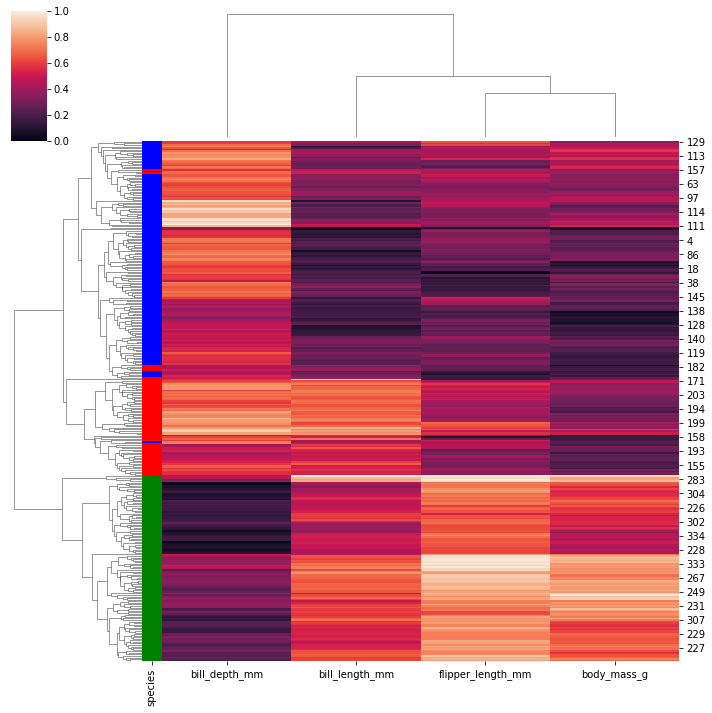

In [25]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, row_colors=species_colors);

## BONUS: Styling

#### `cmap` and `vmin`

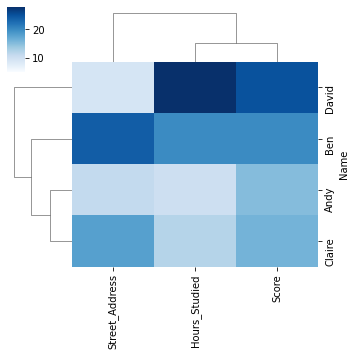

In [26]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5);

#### `row_cluster` and `cbar_pos`

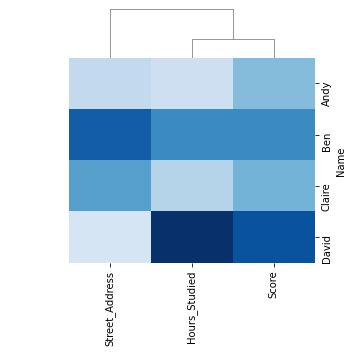

In [27]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5,
               row_cluster=False,
               cbar_pos=None #(0,.4,.05,.35)
              );

#### Annotations with `annot` and `fmt`

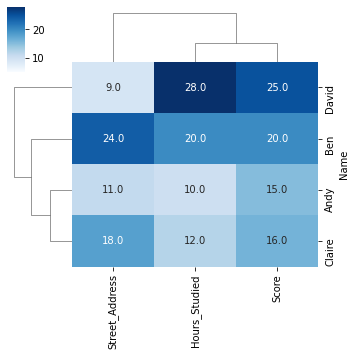

In [28]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5, annot=True, fmt='.1f');

## Overlays and Thumbnail

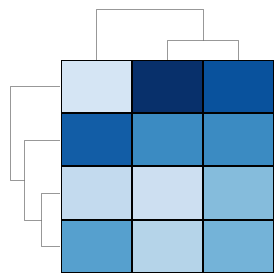

In [34]:
sns.clustermap(toy_data.reset_index().drop('Name', axis=1), 
               figsize=(4, 4), xticklabels=[], 
               yticklabels=[],
               cbar_pos=None,
               cmap='Blues',
               lw=2,
               linecolor='black',
               vmin=5,

              );
#plt.savefig('22clustermap_image_whatIs.png', dpi=200)

### Thumbnail

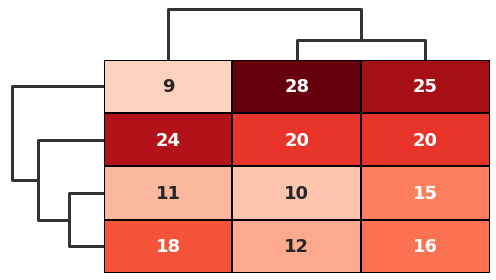

In [35]:
sns.clustermap(toy_data.reset_index().drop('Name', axis=1),
               figsize=(7,4), 
               xticklabels=[],
               yticklabels=[],
               cbar_pos=None,
               cmap='Reds',
               vmin=5,
               tree_kws={'lw': 3},
               lw=2,
               linecolor='black',
               annot=True,
               annot_kws={'fontsize': 18, 'fontweight': 'bold'}
              );
#plt.savefig('22clustermap_image_thumbnail.png', dpi=200)

In [36]:
# Other dataset

In [45]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [42]:
numerical_cols = df.columns[:4]
numerical_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

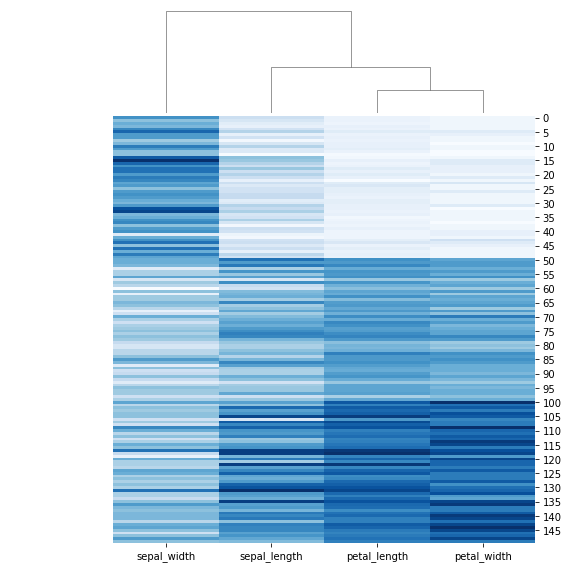

In [67]:
sns.clustermap(df[numerical_cols], figsize=(8, 8),standard_scale=1,row_cluster=False,cbar_pos=None,cmap='Blues');


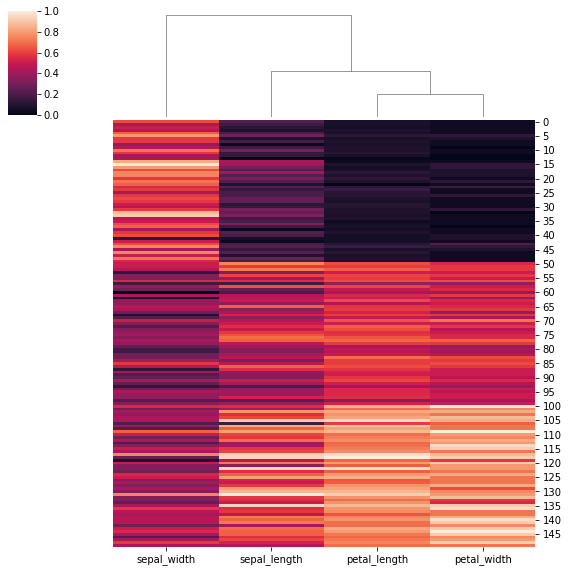

In [62]:
sns.clustermap(df[numerical_cols], figsize=(8, 8),standard_scale=1,row_cluster=False);